In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import pygenstability as pgs
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.sparse import csr_array, csr_matrix
from scipy.sparse.csgraph import shortest_path
from pygenstability import plotting

c:\Users\SBH\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# read the toy matrix from file, use the first row and column as the column and index names
dat = pd.read_csv('Data/python/city_distance_toy.csv', header=0, index_col=0)
# check if this data matrix is symmetric
print(np.allclose(dat, dat.T))
# convert this data matrix to a numpy array
dat = dat.to_numpy()
type(dat)

True


numpy.ndarray

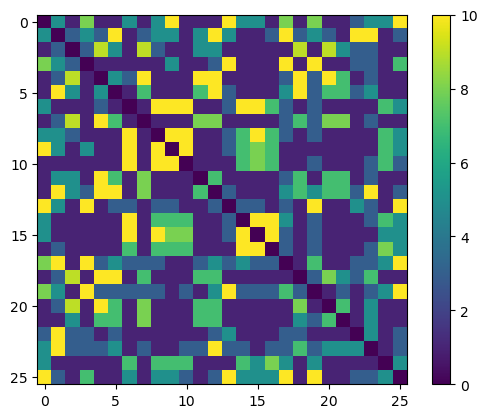

In [5]:
#plot the heatmap of the data matrix
plt.imshow(dat, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()


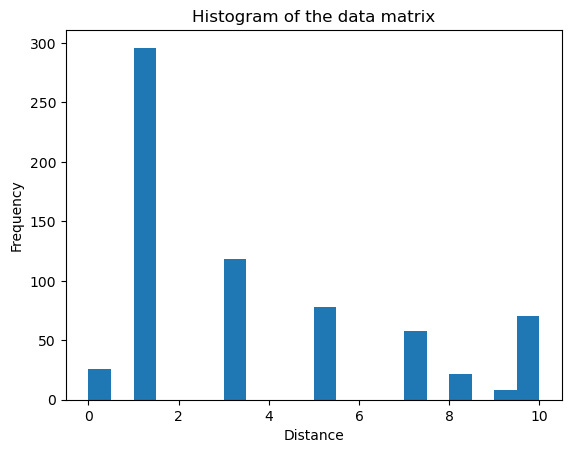

In [3]:
# plot the histogram of the data matrix
plt.hist(dat.flatten(), bins=20)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of the data matrix')
plt.show()

In [4]:
all_results = pgs.run(sp.sparse.csgraph.csgraph_from_dense(dat), constructor='linearized_directed', 
                    min_scale=-1, max_scale=2, n_scale=300, method='leiden', n_NVI=50,
                    log_scale=True, n_tries=20, with_spectral_gap=True)

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:05<00:00, 58.78it/s]


In [21]:
# check the number of each value in the number_of_communities
number_of_communities = all_results['number_of_communities']
number_of_communities = pd.Series(number_of_communities)
number_of_communities.value_counts()

1     151
26    103
3      46
Name: count, dtype: int64

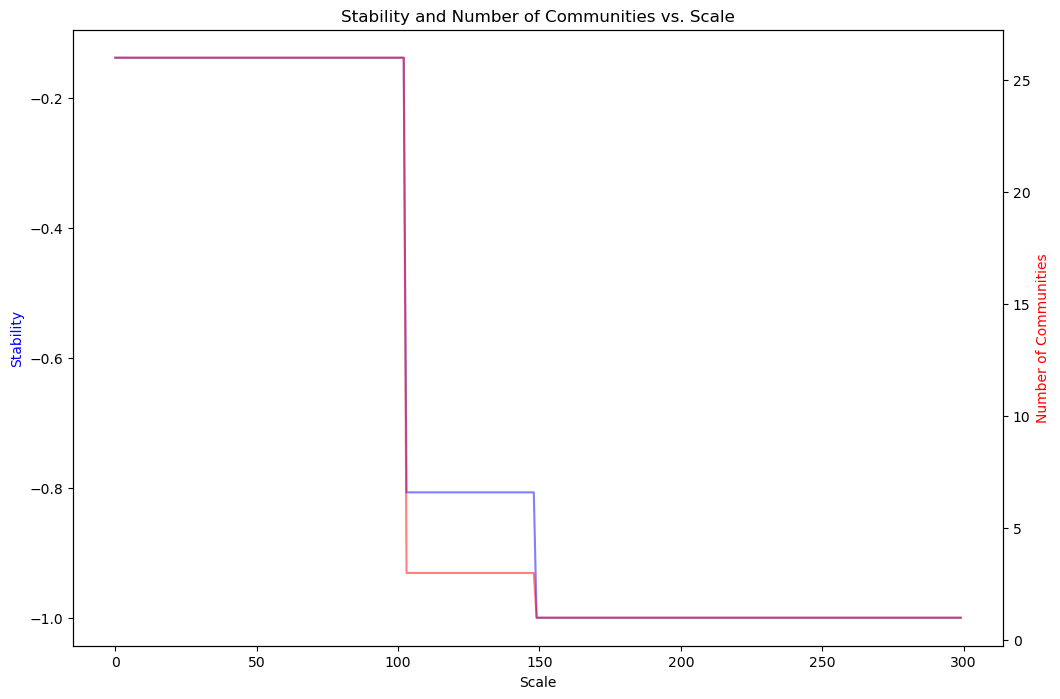

In [22]:
# plot all ['number of communities'] and ['stability'] in the all_results, and use left y-axis for stability and right y-axis for number of communities
plt.figure(figsize=(12, 8))
plt.plot(all_results['stability'], color='blue', alpha=0.5)
plt.ylabel('Stability', color='blue')
plt.xlabel('Scale')
plt.twinx()
plt.plot(all_results['number_of_communities'], color='red', alpha=0.5)
plt.ylabel('Number of Communities', color='red')
plt.title('Stability and Number of Communities vs. Scale')
plt.show()

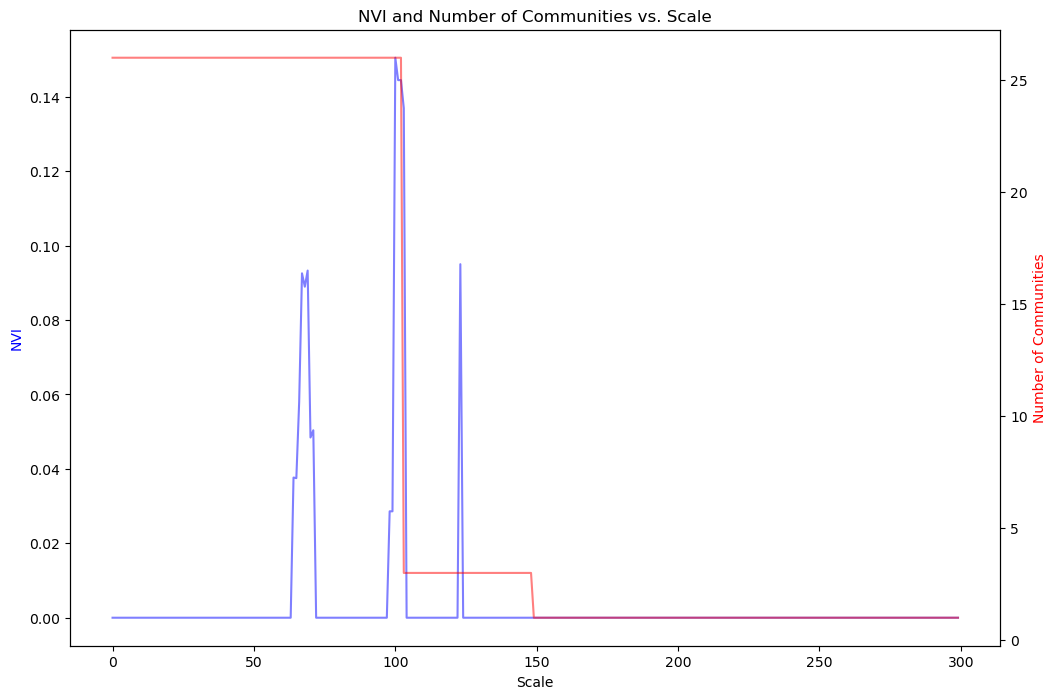

In [23]:
# plot all ['number of communities'] and ['stability'] in the all_results, and use left y-axis for stability and right y-axis for number of communities
plt.figure(figsize=(12, 8))
plt.plot(all_results['NVI'], color='blue', alpha=0.5)
plt.ylabel('NVI', color='blue')
plt.xlabel('Scale')
plt.twinx()
plt.plot(all_results['number_of_communities'], color='red', alpha=0.5)
plt.ylabel('Number of Communities', color='red')
plt.title('NVI and Number of Communities vs. Scale')
plt.show()